Course : MACHINE LEARNING WITH DEPLOYMENT AND DEEP LEARNING

Data Visualization Assignment - By Subham Bagchi

In this assignment students have to transform iris data into 3 dimensions
and plot a 3d chart with transformed dimensions and colour each data
point with specific class.

Hint:

      import numpy as np
      import matplotlib.pyplot as plt
      from mpl_toolkits.mplot3d import Axes3D
      from sklearn import decomposition
      from sklearn import datasets

In [131]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [132]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url,names=['sepal length','sepal width','petal length','petal width','targets'])

In [133]:
df.head()

,sepal length,sepal width,petal length,petal width,targets
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [134]:
features = ['sepal length','sepal width','petal length','petal width','targets']

In [135]:
x = df.iloc[:,:-1].values

In [136]:
y = df.iloc[:,4].values

In [137]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

In [138]:
principalComponents 

array([[-2.68420713,  0.32660731, -0.02151184],
       [-2.71539062, -0.16955685, -0.20352143],
       [-2.88981954, -0.13734561,  0.02470924],
       [-2.7464372 , -0.31112432,  0.03767198],
       [-2.72859298,  0.33392456,  0.0962297 ],
       [-2.27989736,  0.74778271,  0.17432562],
       [-2.82089068, -0.08210451,  0.26425109],
       [-2.62648199,  0.17040535, -0.01580151],
       [-2.88795857, -0.57079803,  0.02733541],
       [-2.67384469, -0.1066917 , -0.1915333 ],
       [-2.50652679,  0.65193501, -0.069275  ],
       [-2.61314272,  0.02152063,  0.10765035],
       [-2.78743398, -0.22774019, -0.20032779],
       [-3.22520045, -0.50327991,  0.06841363],
       [-2.64354322,  1.1861949 , -0.1445057 ],
       [-2.38386932,  1.34475434,  0.28373066],
       [-2.6225262 ,  0.81808967,  0.14531599],
       [-2.64832273,  0.31913667,  0.03339425],
       [-2.19907796,  0.87924409, -0.11452146],
       [-2.58734619,  0.52047364,  0.21957209],
       [-2.3105317 ,  0.39786782, -0.233

In [139]:
type(principalComponents)

numpy.ndarray

In [140]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [144]:
principalDf.head()

,principal component 1,principal component 2,principal component 3
0,-2.684207,0.326607,-0.021512
1,-2.715391,-0.169557,-0.203521
2,-2.889820,-0.137346,0.024709
3,-2.746437,-0.311124,0.037672
4,-2.728593,0.333925,0.096230


In [143]:
finalDf = pd.concat([principalDf, df[['targets']]], axis = 1)

In [145]:
finalDf.head()

,principal component 1,principal component 2,principal component 3,targets
0,-2.684207,0.326607,-0.021512,Iris-setosa
1,-2.715391,-0.169557,-0.203521,Iris-setosa
2,-2.889820,-0.137346,0.024709,Iris-setosa
3,-2.746437,-0.311124,0.037672,Iris-setosa
4,-2.728593,0.333925,0.096230,Iris-setosa


In [146]:
x_values = finalDf['principal component 1']

In [147]:
y_values = finalDf['principal component 2']

In [148]:
z_values = finalDf['principal component 3']

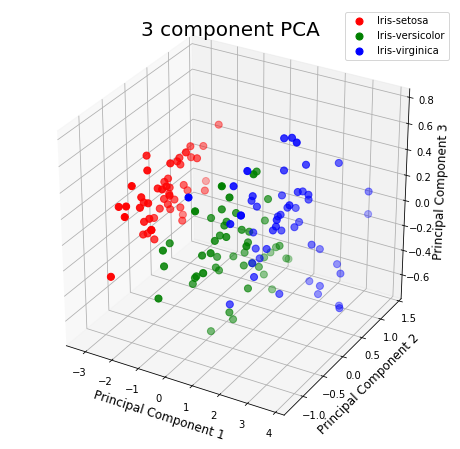

In [157]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.set_xlabel('Principal Component 1',fontsize=12)
ax.set_ylabel('Principal Component 2',fontsize=12)
ax.set_zlabel('Principal Component 3',fontsize=12)
ax.set_title('3 component PCA',fontsize=20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r','g','b']

for target,color in zip(targets,colors):
    toKeep = finalDf['targets'] == target
    ax.scatter(finalDf.loc[toKeep,'principal component 1'],finalDf.loc[toKeep,'principal component 2'],finalDf.loc[toKeep,'principal component 3'],c=color,s=50)
    
ax.legend(targets)
ax.grid()
plt.show()

    
    